# Imports

In [1]:
# Standard python library-imports
import os
import dill as pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# directory
notebook_dir = os.getcwd()
current_dir ='../../../../../'
os.chdir(current_dir)
# os.getcwd()

In [2]:
# print(os.getcwd())

In [3]:
from src.codes.basic import *
from src.codes.utils.fem_utils_StrucMech import *
from src.codes.utils.plot_files.plot_utils import OneDPlot as plot
from src.codes.utils.plot_files.plot_utils import data_stats
from src.codes.utils.rom_utils import *
from src.codes.utils.dynamical_systems import *
import time as time

from src.codes.prob_classes.structural_mechanics.base_class_struc_mech_continuous_vibration import ROM_simulation_p
from src.codes.algorithms.ecsw import ecsw_red
from src.codes.algorithms.ecsw import ecsw_red_SS_parametric


---

# Load HFS data

In [4]:
print(os.getcwd())

c:\Users\suparnob\OneDrive - Texas A&M University\Academic\TAMU_MATERIALS\POSTDOC\HYPERREDUCTION\SUPARNO\HYPERREDUCTION__TAMIDS\pyHyperRom


In [5]:
filename_dataC = './examples/structural_mechanics/Transverse/continuous_vibrations/oneD_beam/data/DataClass_structMech_50p.dill'


with open(filename_dataC, 'rb') as f:
    Data_cls = pickle.load(f)

FOS = Data_cls.FOS
d = FOS.data
mask_dv = np.append(d.mask, d.mask)

param_list = np.asarray(Data_cls.param_list)
NLS = np.asarray(Data_cls.NL_solutions)

K_mus = Data_cls.K_mus
C_mus = Data_cls.C_mus
t = Data_cls.t
q_mus = Data_cls.q_mus
T = Data_cls.T

In [6]:
param_list

array([0.0127324 , 0.01572061, 0.01870883, 0.02169704, 0.02468526,
       0.02767347, 0.03066169, 0.0336499 , 0.03663812, 0.03962633,
       0.04261455, 0.04560276, 0.04859098, 0.05157919, 0.05456741,
       0.05755562, 0.06054384, 0.06353205, 0.06652027, 0.06950849,
       0.0724967 , 0.07548492, 0.07847313, 0.08146135, 0.08444956,
       0.08743778, 0.09042599, 0.09341421, 0.09640242, 0.09939064,
       0.10237885, 0.10536707, 0.10835528, 0.1113435 , 0.11433171,
       0.11731993, 0.12030814, 0.12329636, 0.12628458, 0.12927279,
       0.13226101, 0.13524922, 0.13823744, 0.14122565, 0.14421387,
       0.14720208, 0.1501903 , 0.15317851, 0.15616673, 0.15915494])

In [7]:
## Details of the data
print(f"Total number of datasets {len(NLS)}")

N_params = NLS.shape[0]
N_dim = NLS.shape[1]
nt = NLS.shape[2]

NLS.shape

Total number of datasets 50


(50, 404, 5001)

---

# Clustering Data

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [9]:
flattened_all_matrices = np.array([m.flatten() for m in NLS])
# flattened_all_matrices.shape

In [10]:
# Generate the linkage matrix using Ward's method
Z_all = linkage(flattened_all_matrices, method='ward')

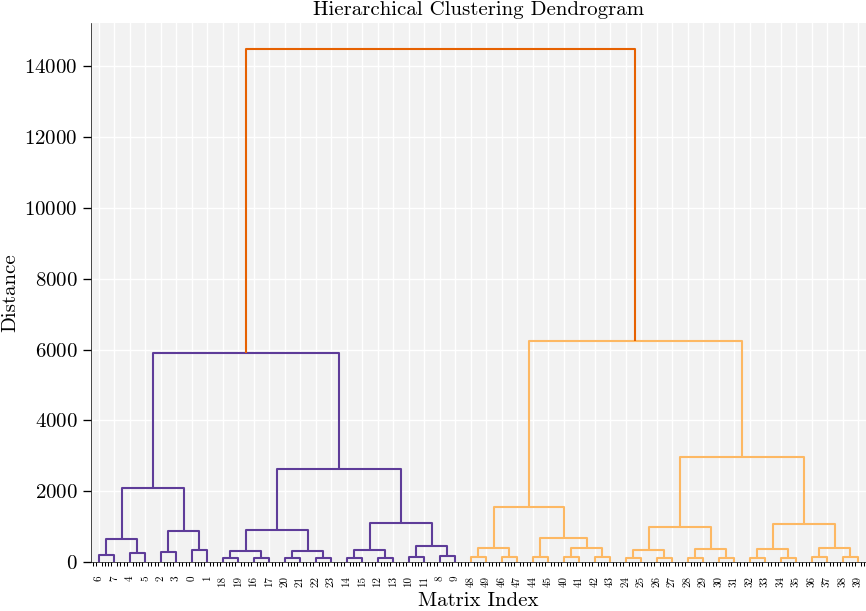

In [11]:
# Plot the dendrogram for the new set of matrices
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(
    Z_all,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.xlabel('Matrix Index')
plt.ylabel('Distance')
plt.show()

In [12]:
max_d = 8000  # for example, adjust based on your dendrogram # Decide on a threshold distance to determine the clusters, then assign matrices to clusters
clusters = fcluster(Z_all, max_d, criterion='distance')

NLS_cl = [[] for _ in range(clusters.max())]
param_cl = [[] for _ in range(clusters.max())]
K_mus_cl = [[] for _ in range(clusters.max())]
q_mus_cl = [[] for _ in range(clusters.max())]
C_mus_cl = [[] for _ in range(clusters.max())]

# Print cluster assignments
for i, cluster in enumerate(clusters):
    print(f"Matrix {i} belongs to cluster {cluster}")
    NLS_cl[cluster-1].append(NLS[i,:,:])
    param_cl[cluster-1].append(param_list[i])
    K_mus_cl[cluster-1].append(K_mus[i])
    q_mus_cl[cluster-1].append(q_mus[i])
    C_mus_cl[cluster-1].append(C_mus[i])

Matrix 0 belongs to cluster 1
Matrix 1 belongs to cluster 1
Matrix 2 belongs to cluster 1
Matrix 3 belongs to cluster 1
Matrix 4 belongs to cluster 1
Matrix 5 belongs to cluster 1
Matrix 6 belongs to cluster 1
Matrix 7 belongs to cluster 1
Matrix 8 belongs to cluster 1
Matrix 9 belongs to cluster 1
Matrix 10 belongs to cluster 1
Matrix 11 belongs to cluster 1
Matrix 12 belongs to cluster 1
Matrix 13 belongs to cluster 1
Matrix 14 belongs to cluster 1
Matrix 15 belongs to cluster 1
Matrix 16 belongs to cluster 1
Matrix 17 belongs to cluster 1
Matrix 18 belongs to cluster 1
Matrix 19 belongs to cluster 1
Matrix 20 belongs to cluster 1
Matrix 21 belongs to cluster 1
Matrix 22 belongs to cluster 1
Matrix 23 belongs to cluster 1
Matrix 24 belongs to cluster 2
Matrix 25 belongs to cluster 2
Matrix 26 belongs to cluster 2
Matrix 27 belongs to cluster 2
Matrix 28 belongs to cluster 2
Matrix 29 belongs to cluster 2
Matrix 30 belongs to cluster 2
Matrix 31 belongs to cluster 2
Matrix 32 belongs 

#### Visualize clustered data

(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)


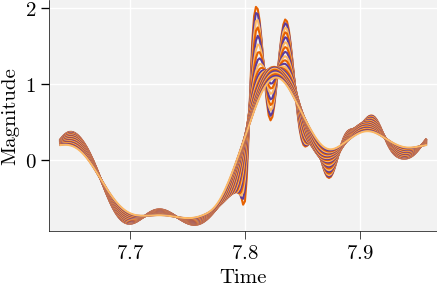

(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)
(404, 201)


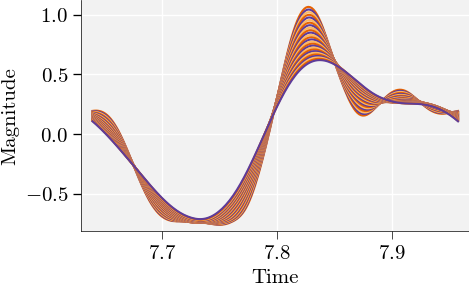

In [13]:
ntd = 200+1
for i in range(clusters.max()):

    fig,ax = plt.subplots(figsize=(5,3))
    data_col = 304
    # len(NLS)
    for j in range(0,len(NLS_cl[i])):
        solution_snapshot_f_nset0 = NLS_cl[i][j][:,nt-ntd:nt]
        print(solution_snapshot_f_nset0.shape)
        ax.plot(t[-ntd:], solution_snapshot_f_nset0[data_col,:])

    plt.xlabel("Time")
    plt.ylabel("Magnitude")
    plt.show()

In [14]:
#### Identify the cluster of a new matrix 

# from scipy.spatial.distance import cdist

# # Assuming `flattened_all_matrices` is your original flattened matrix vectors
# # and `clusters` contains their cluster assignments

# # Step 1: Flatten the new matrix and calculate distances
# new_matrix = np.random.rand(199, 198)  # Your new matrix
# new_vector = new_matrix.flatten().reshape(1, -1)  # Flatten and reshape for distance calculation
# distances = cdist(new_vector, flattened_all_matrices)[0]  # Compute distances to all other matrices

# # Step 2: Find the nearest neighbors (e.g., the closest 5 matrices)
# nearest_neighbors_indices = distances.argsort()[:5]  # Change 5 to however many neighbors you want to consider

# # Step 3: Assign the new matrix to the most common cluster among its nearest neighbors
# nearest_clusters = clusters[nearest_neighbors_indices]
# new_matrix_cluster = np.bincount(nearest_clusters).argmax()

# print(f"The new matrix belongs to cluster {new_matrix_cluster}")


# Process Data

##### DOF selection

In [15]:
# # Assuming 'original_array' has shape (9, 404, 5001)
# # Transpose to switch dimensions to (9, 5001, 404), preparing for the vertical stack
# Data=NLS_cl.transpose(0, 2, 1)

# # Reshape to stack vertically, which now simply flattens the first two dimensions
# solution_snapshot_orig = Data.reshape(-1, Data.shape[-1])

cluster = 0

solution_snapshot_orig = NLS_cl[cluster][0].T

N_params = len(NLS_cl[cluster])
N_dim = solution_snapshot_orig.shape[1]
nt = solution_snapshot_orig.shape[0]

for i in range(1,N_params):
    solution_snapshot_orig = np.vstack([solution_snapshot_orig,NLS_cl[cluster][i].T])


solution_snapshot_orig = solution_snapshot_orig[:,mask_dv]

In [16]:
# state_dim_wangle = solution_snapshot_orig.shape[1]
# dofs_wangle = int(state_dim_wangle/2)

# mask_eliminate_angle = np.ones(solution_snapshot_orig.shape[1]).astype(bool)
# mask_eliminate_angle[:dofs_wangle:2] = False
# mask_eliminate_angle[dofs_wangle-1] = False

# mask_eliminate_angle[dofs_wangle::2] = False
# mask_eliminate_angle[2*dofs_wangle-1] = False

In [17]:
# solution_snapshot_orig = solution_snapshot_orig[:,mask_eliminate_angle]

##### Size of the data

In [18]:
solution_snapshot_orig.shape # (N_params x nt) x n_dim

(120024, 400)

#### Visualize

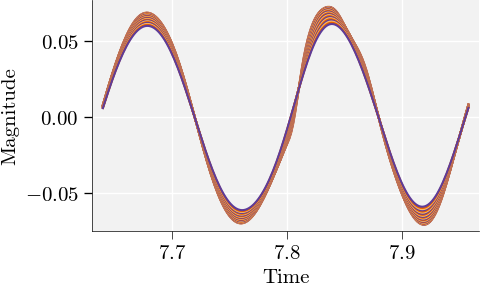

In [19]:
fig,ax = plt.subplots(figsize=(5,3))
data_col = 179
# len(NLS)
for i in range(1,N_params):
    solution_snapshot_f_nset0 = solution_snapshot_orig[(i)*nt-ntd:(i)*nt,:]
    ax.plot(t[-ntd:], solution_snapshot_f_nset0[:,data_col])

plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()

In [20]:
#  solution_snapshot_f_nset0[:,180]

---

##### Temporal processing

In [21]:
# scaling_location = notebook_dir+'\\data\\'+'scaling_params\\'
# scaling_fileName = scaling_location+'scaling_params'
# if not os.path.isdir(scaling_location):
#     os.mkdir(scaling_location)

In [22]:
solution_snapshot_f, nt, fs, tstop, ndata, nset, tn, q_mus_truncated = fom_data_processor_stacked_q(t, T, solution_snapshot_orig, q_mus_cl[cluster])

##### Size

In [23]:
# q_mus_truncated[0][0].shape

#### Visualize

**A**

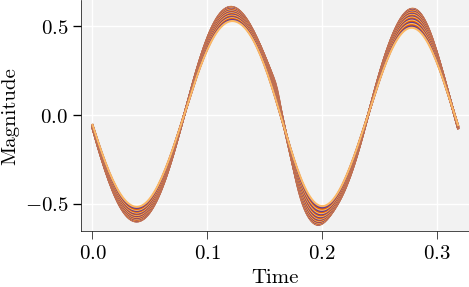

In [24]:
fig,ax = plt.subplots(figsize=(5,3))
# len(NLS)
solution_snapshot_f_nset=np.zeros((N_params,nt,solution_snapshot_f.shape[-1]))

for i in range(N_params):
    solution_snapshot_f_nset[i] = solution_snapshot_f[i*nt:(i+1)*nt,:]
    ax.plot(tn, solution_snapshot_f_nset[i][:,180])

plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()


**B**

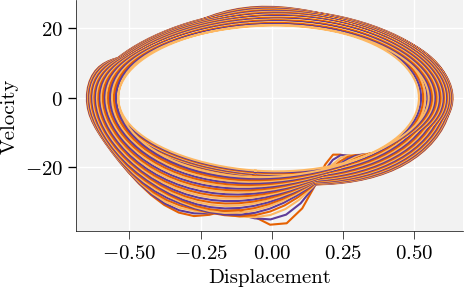

In [25]:
fig,ax = plt.subplots(figsize=(5,3))
# len(NLS)

for i in range(N_params):
    # solution_snapshot_f_nset = solution_snapshot_f[i*nt:(i+1)*nt,:]
    ax.plot(solution_snapshot_f_nset[i][:,182],solution_snapshot_f_nset[i][:,382])

plt.xlabel("Displacement")
plt.ylabel("Velocity")
plt.show()


In [26]:
## Save the data set
# os.chdir(notebook_dir)
# np.save(f'data/snapshots_p_{len(param_cl[cluster])}params.npy',solution_snapshot_f)
# np.save(f'data/params_{len(param_cl[cluster])}.npy',param_cl[cluster])

---

## ECSW Hyper-reduction

### Train-Test split

In [101]:
train_mask_t, _ = sobol_train_test_split(nt, train_percentage = 0.1)

In [102]:
solution_snapshot_ecsw=np.zeros((N_params,len(train_mask_t[train_mask_t==True]),solution_snapshot_f.shape[-1]))
solution_snapshot_ecsw_disp_svd = solution_snapshot_f[:nt,:][train_mask_t]

for i in range(1,N_params):
    solution_snapshot_ecsw[i] = solution_snapshot_f[i*nt:(i+1)*nt,:][train_mask_t]
    solution_snapshot_ecsw_da_svd = np.vstack([solution_snapshot_ecsw_disp_svd, solution_snapshot_ecsw[i]])

In [103]:
dim_da = int(solution_snapshot_ecsw_da_svd.shape[1]/2) # train only on disp_vel
NLS_wd_train_da = solution_snapshot_ecsw_disp_svd[:,:dim_da]

In [104]:
NLS_train_mean = np.mean(NLS_wd_train_da,axis=0)
NLS_train_ms = NLS_wd_train_da - NLS_train_mean

In [105]:
NLS_train_mean.shape

(200,)

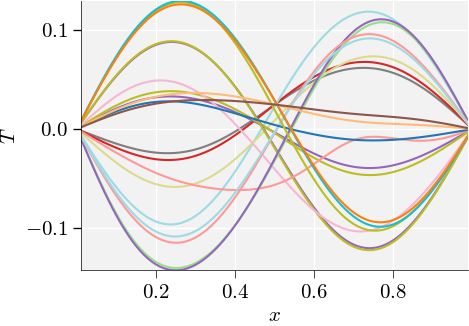

In [106]:
fig, ax = plt.subplots(figsize=(5,3.5))

for i in range(NLS_train_ms.shape[0]):
    Plot = plot(d.xi[0][1:-1], NLS_train_ms[i][1:-1:2], ax=ax)
    Plot.line_()

plt.show()


#### Step 1: Perform SVD on the snapshots (calculate $\mathbb{V}(=\mathbb{W}$)):

Number of modes selected: 9


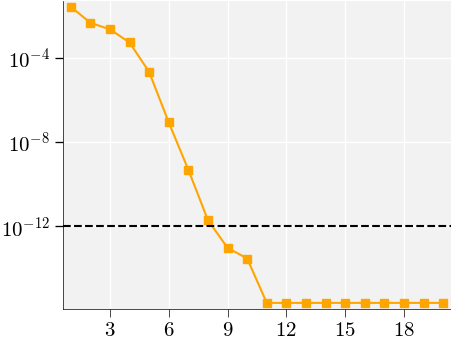

In [149]:
plt.rcParams['figure.dpi'] = 100
n_sel, U = svd_mode_selector(NLS_train_ms, tolerance=1e-12,modes=True)
V_sel = U[:, :n_sel]

In [150]:
V_sel.shape

(200, 9)

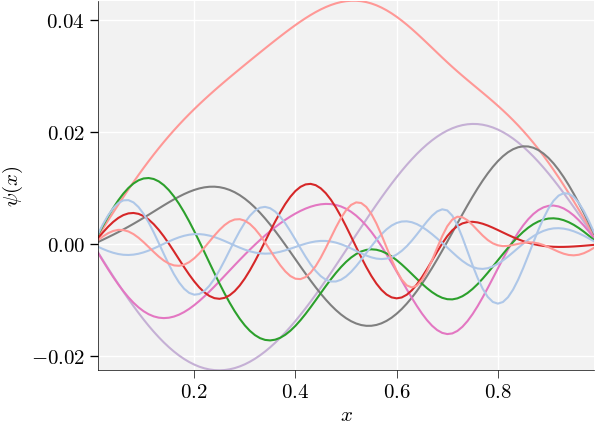

In [151]:
fig, ax = plt.subplots()

for i in range(n_sel):
    Plot = plot(d.xi[0][1:-1], V_sel[1:-1:2,i], ax=ax)
    Plot.line_()

Plot.ax.set_xlabel('$x$')
Plot.ax.set_ylabel('$\psi(x)$')

plt.show()

### Step 2: Perform NNLS for ECSW

In [174]:
_,N_snap_train = np.shape(NLS_wd_train_da)
tol = 1e-3

In [175]:
N_snap_train = solution_snapshot_ecsw.shape[0]*solution_snapshot_ecsw.shape[1]

In [176]:
data = {'K_mus':K_mus,'q_mus':q_mus_truncated, 'C_mus':C_mus}

In [177]:
tic_h_setup_b = time.time()

xi, residual = ecsw_red_SS_parametric(d, V_sel, d.Le, data, n_sel, solution_snapshot_ecsw, NLS_train_mean, Data_cls.FOS.residual_func_p, train_mask_t, tol=tol)

toc_h_setup_b = time.time()

norm of rhs: 30.397747125107106


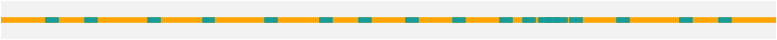

Fraction of total elements active in the ROM: 18.0%
residual=0.0006729389363437195


In [178]:
plot(np.arange(d.ncells[0]), xi, ax="").element_()
print(f"Fraction of total elements active in the ROM: {len(xi[xi>0])*100/len(xi)}%")
print(f"{residual=}")


### ROM Simulation

In [179]:
ROM_h = ROM_simulation_p(Data_cls, V_sel, xi, N_rom_snap=20)
ROM_h.run_simulation()

c:\Users\suparnob\AppData\Local\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:602: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
c:\Users\suparnob\OneDrive - Texas A&M University\Academic\TAMU_MATERIALS\POSTDOC\HYPERREDUCTION\SUPARNO\HYPERREDUCTION__TAMIDS\pyHyperRom\src\codes\utils\fem_utils_StrucMech.py:385: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  MK_inv = spalg.spsolve(M, K).toarray()
c:\Users\suparnob\OneDrive - Texas A&M University\Academic\TAMU_MATERIALS\POSTDOC\HYPERREDUCTION\SUPARNO\HYPERREDUCTION__TAMIDS\pyHyperRom\src\codes\utils\fem_utils_StrucMech.py:386: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  MC_inv = spalg.spsolve(M, C).toarray()


In [180]:
ROM = ROM_simulation_p(Data_cls, V_sel, N_rom_snap=20)
ROM.run_simulation()

### Performance Statistics

In [181]:
NLS_rom_h = np.asarray(ROM_h.NL_solutions_rom)
ROM_speed_up_h = ROM_h.speed_up
print(ROM_speed_up_h)

[15.00216779051926, 15.355868696249042, 15.382792903547443, 14.578904621720637, 15.169454223029138, 14.725801142463588, 14.164632263944766, 13.003028785982478, 12.614771920051647, 12.812384021877136, 16.050430378931953, 12.632497748094119, 9.671412463149887, 12.01799882198547, 11.843709883167636, 13.158702290263259, 12.238212106074757, 14.32509255097248, 13.013439547905667, 13.370047297911572]


In [182]:
NLS_rom = np.asarray(ROM.NL_solutions_rom)
ROM_speed_up = ROM.speed_up
print(ROM_speed_up)

[3.70997162305279, 3.478413197622272, 3.5712357015041865, 3.4537592992319066, 3.4237273599008926, 3.447246144353142, 3.3330669756876583, 3.4938242467635456, 3.5084240936825752, 3.442668161702432, 3.6496503914493506, 3.3576649070354105, 3.3540421832984104, 3.4623002063058745, 3.5004652921945216, 3.19831685201332, 3.296076183345422, 3.4367863515056785, 3.5195089496762857, 3.3312751202286086]


Relative error in displacement: 0.024635501639896706
Relative error in velocity: 0.02666680612804897


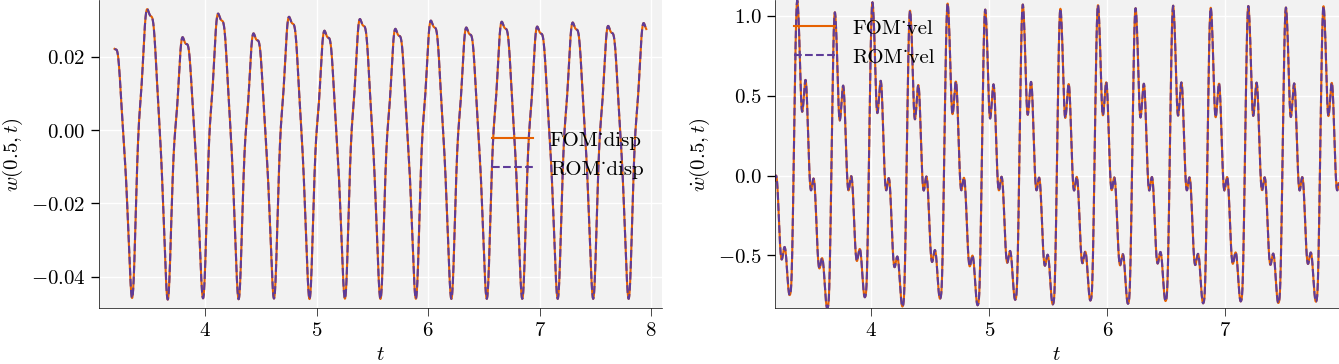

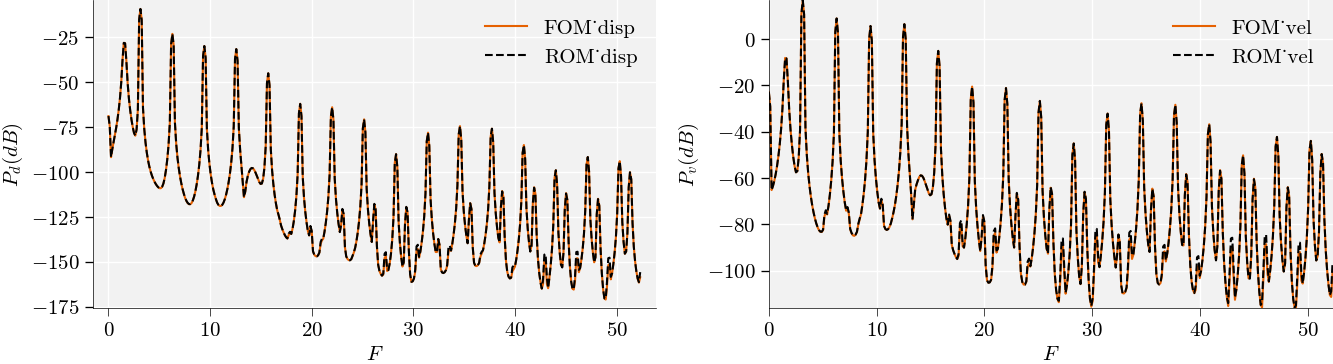

In [183]:
compare_models(NLS[19], ROM_h.NL_solutions_rom[19], t,fc=50)

Relative error in displacement: 0.02720764802397747
Relative error in velocity: 0.12487164176291446


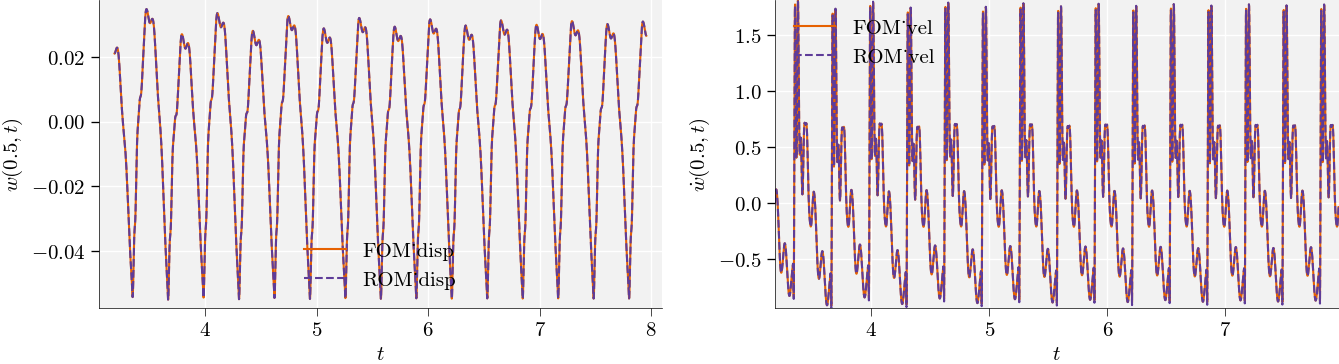

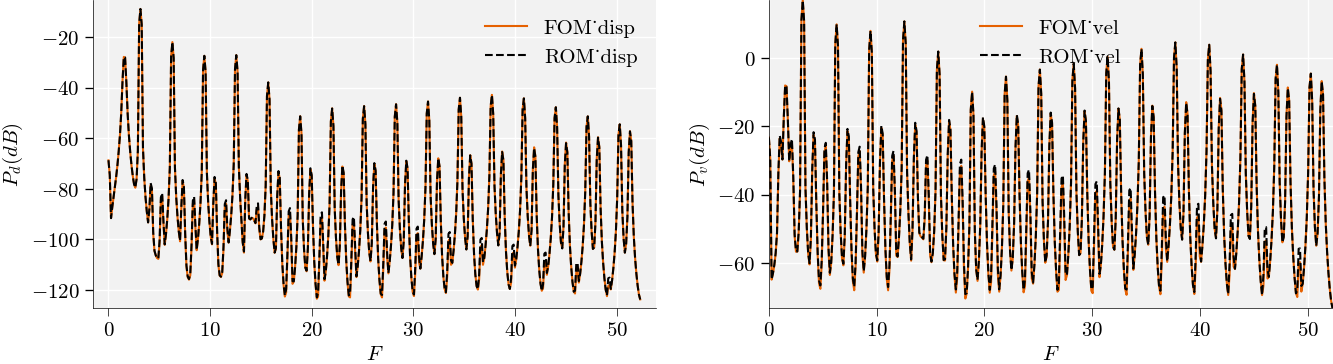

In [184]:
compare_models(NLS[0], ROM_h.NL_solutions_rom[0], t,fc=50)